In [3]:
pip install graphviz

Input an expression: 3 + 4 * 2


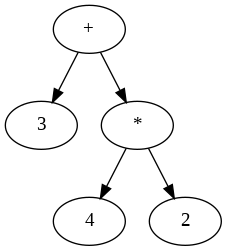

In [14]:
import re
from graphviz import Digraph
from IPython.display import Image, display

class SyntaxTree:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def parse_expression(tokens):
    root = parse_term(tokens)

    while tokens and (tokens[0] == '+' or tokens[0] == '-'):
        operator = tokens.pop(0)
        right = parse_term(tokens)
        new_root = SyntaxTree(operator)
        new_root.left = root
        new_root.right = right
        root = new_root

    return root

def parse_term(tokens):
    left = parse_factor(tokens)

    while tokens and (tokens[0] == '*' or tokens[0] == '/'):
        operator = tokens.pop(0)
        right = parse_factor(tokens)
        new_root = SyntaxTree(operator)
        new_root.left = left
        new_root.right = right
        left = new_root

    return left


def parse_factor(tokens):
    token = tokens.pop(0)
    if re.match(r'\d+', token):
        return SyntaxTree(int(token))
    elif token == '(':
        expr_inside_parentheses = parse_expression(tokens)
        if tokens and tokens[0] == ')':
            tokens.pop(0)  # Consume the closing parenthesis
            return expr_inside_parentheses
        else:
            raise SyntaxError("Mismatched parentheses")
    else:
        raise SyntaxError(f"Invalid token: {token}")

def build_syntax_tree(input_string):
    tokens = re.findall(r'(\d+|\+|-|\*|/|\(|\))', input_string)
    tree = parse_expression(tokens)
    return tree

def create_dot_graph(node, dot=None):
    if dot is None:
        dot = Digraph(comment='Syntax Tree')

    if node:
        dot.node(str(id(node)), str(node.value))
        if node.left:
            dot.node(str(id(node.left)), str(node.left.value))
            dot.edge(str(id(node)), str(id(node.left)))
            create_dot_graph(node.left, dot)
        if node.right:
            dot.node(str(id(node.right)), str(node.right.value))
            dot.edge(str(id(node)), str(id(node.right)))
            create_dot_graph(node.right, dot)

    return dot

def visualize_syntax_tree(tree):
    dot = create_dot_graph(tree)
    dot.render('syntax_tree', format='png', cleanup=True)
    display(Image(filename='syntax_tree.png'))


  # Call the functions
input_expr = input("Input an expression: ")
tree = build_syntax_tree(input_expr)
visualize_syntax_tree(tree)
